# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Цель исследования** — изучить состояние рынка недвижимости Санкт-Петербурга И Ленинградской области:
    
1. Узнать в течение какого срока продаётся недвижимость. Вероятно, есть высокий спрос на жильё в мегаполисе и окружающих его населённых пунктах, из-за чего обявления активны недолго.
2. Изучить какие факторы влияют на цену недвижимости. Предположительно на неё влияет площаь квартиры, то на каком этаже она размещена и количество комнат.

**Ход исследования**

Мы получили архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет в файле `real_estate_data.csv`. Для выполнения поставленной исследовательской задачи нужно провести обзор данных, оценить их качество, устранить ошибки и минимизировать их влияние на исследование. 

Исследование пройдёт в три этапа:
 1. Обзор данных.
 2. Предобработка данных.
 3. Обогащение данных за счёт имеющейся информации.
 4. Проведение исследовательского анализа.

### Откройте файл с данными и изучите общую информацию. 

Импортируем необходимые библиотеки Python

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

import numpy as np

import warnings
warnings.filterwarnings('ignore')

Откроем файл и выведем первые 10 строк датафрейма для предварительной оценки данных.

In [10]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://raw.githubusercontent.com/Cellport/Projects/main/%D0%98%D1%81%D1%81%D0%BB%D0%B5%D0%B4%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5%20%D0%BE%D0%B1%D1%8A%D1%8F%D0%B2%D0%BB%D0%B5%D0%BD%D0%B8%D0%B9%20%D0%BE%20%D0%BF%D1%80%D0%BE%D0%B4%D0%B0%D0%B6%D0%B5%20%D0%BA%D0%B2%D0%B0%D1%80%D1%82%D0%B8%D1%80/real_estate_data.csv')

In [11]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Из первых строк датафрейма видно, что в некоторых столбцах есть пропуски. Проверим общую информацию о датафрейме, вместе со столбцами, где есть пропуски, увидим данные какого типа в них хранятся.

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Дополнительно построим гистограмму для всей таблицы, это позволит предварительно визуально оценить исходные данные.

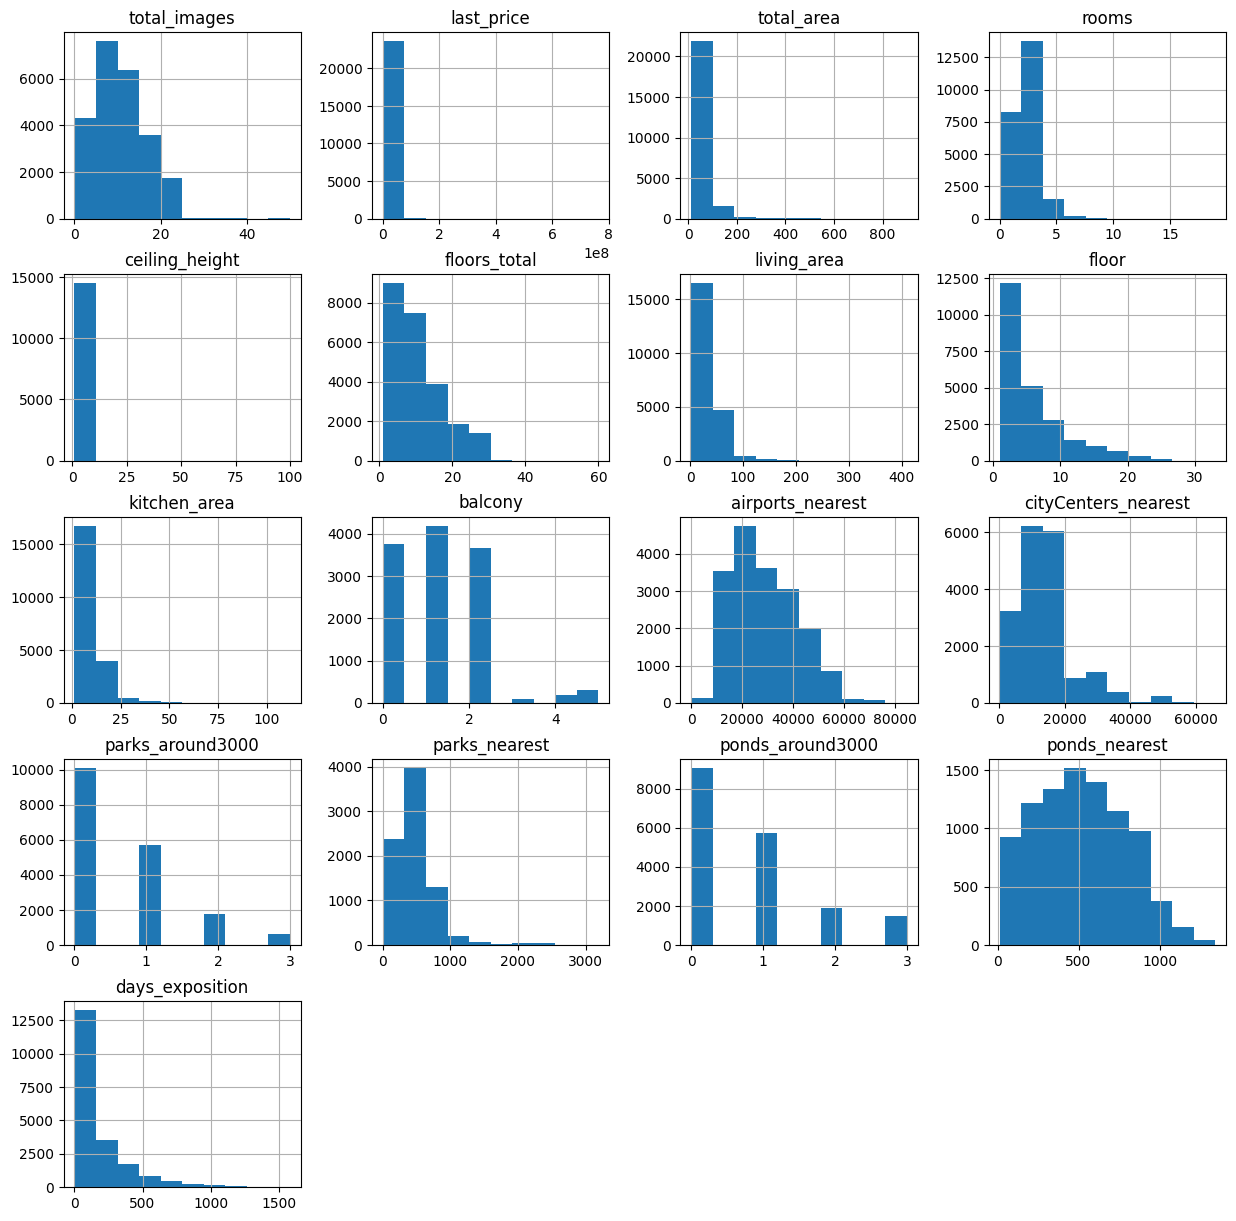

In [13]:
data.hist(figsize=(15, 15));

### Предобработка данных

#### Поиск и изучение пропущенных значений в столбцах

Разберёмся подробнее в каких столбцах датафрейма есть пропуски и в каком количестве.

In [14]:
data.isna().sum().sort_values(ascending=False)

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
cityCenters_nearest      5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

In [15]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


В столбцах **floors_total** и **locality_name** пропусков незначительное количество - меньше 5%, поэтому от них можно избавиться без потери ценных данных.

In [16]:
data = data.dropna(subset=['floors_total', 'locality_name'])
data.isna().sum().sort_values(ascending=False)

is_apartment            20805
parks_nearest           15535
ponds_nearest           14529
balcony                 11475
ceiling_height           9084
airports_nearest         5524
cityCenters_nearest      5501
ponds_around3000         5500
parks_around3000         5500
days_exposition          3171
kitchen_area             2222
living_area              1865
locality_name               0
total_images                0
last_price                  0
studio                      0
floor                       0
floors_total                0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

Для того, чтобы продолжить обработку пропусков, оценим данные и получим представление о распределении значений.

In [17]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23565.0,9.878421e+00,5.681156e+00,0.0,6.00,9.00,14.0,50.0
last_price,23565.0,6.540058e+06,1.091093e+07,12190.0,3400000.00,4646000.00,6790000.0,763000000.0
total_area,23565.0,6.032282e+01,3.565706e+01,12.0,40.00,52.00,69.7,900.0
rooms,23565.0,2.070656e+00,1.078591e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14481.0,2.771283e+00,1.261983e+00,1.0,2.51,2.65,2.8,100.0
floors_total,23565.0,1.067588e+01,6.594823e+00,1.0,5.00,9.00,16.0,60.0
living_area,21700.0,3.445482e+01,2.204536e+01,2.0,18.60,30.00,42.3,409.7
floor,23565.0,5.878124e+00,4.871485e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21343.0,1.056099e+01,5.900630e+00,1.3,7.00,9.10,12.0,112.0
balcony,12090.0,1.157155e+00,1.070877e+00,0.0,0.00,1.00,2.0,5.0


Пропуски в столбцах **rooms**, **ceiling_height**, и **kitchen_area** (площадь кухни) заполним медианными значениями, потому что они соответствуют параметрам стандартной типовой застройки. Пропуски в столбце **living_area** заполним также медианными значениями, но с группировкой по населённому пункту, так как  в сельской местности больше частной застройки и может быть больше нетипичной площади жилья.

Пропуски в столбце **balcony** (число балконов) заменим нулевым значением, вероятно автор объявления просто не указал здесь ничего, так как нет балкона.

Пропуски в столбцах **airports_nearest**, **cityCenters_nearest** (расстояние от центра города), **parks_around3000** (число парков в диапазоне 3 км) и **parks_nearest** (расстояние до ближайшего парка) заменим медианой с группировкой по столбцу **locality_name** (населённый пункт), так как указанные параметры зависят от места проживания. Пропуски в столбце **locality_name** заполним текстовым значением 'Не определён' так как достоверно определить населённый пункт по другим признакам затруднительно.

In [18]:
data[['ceiling_height', 'kitchen_area']] = data[['ceiling_height', 'kitchen_area']].fillna(data[['ceiling_height', 'kitchen_area']].median())

In [19]:
for name in data['locality_name'].unique():
 	median = data.loc[data['locality_name'] == name, 'living_area'].median()
 	data.loc[(data['living_area'].isna()) & (data['living_area'] == name), 'living_area'] = median

data.loc[data['living_area'].isna(), 'living_area'] = data['living_area'].median()

In [20]:
data['balcony'] = data['balcony'].fillna(0)

In [21]:
data['locality_name'] = data['locality_name'].fillna(value='Не определён')
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Пропуски в столбцах **airports_nearest**, **cityCenters_nearest**, **parks_around3000** и **parks_nearest** сгруппируем по названию населённого пункта - столбец **locality_name**, но для этого избавимся от неявных дубликатов в указанном столбце.

In [22]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [23]:
data['locality_name'] = data['locality_name'].replace({'поселок': 'посёлок', 'Никольское': 'село Никольское', 'городской посёлок Советский': 'посёлок городского типа Советский', 'городской посёлок Большая Ижора': 'посёлок городского типа Большая Ижора', 'городской посёлок Лесогорский': 'посёлок городского типа Лесогорский', 'посёлок Рябово': 'посёлок городского типа Рябово', 'городской посёлок Мга': 'посёлок городского типа Мга', 'городской посёлок Павлово': 'посёлок городского типа Павлово', 'городской посёлок Назия': 'посёлок городского типа Назия', 'коттеджный посёлок Лесное': 'посёлок Лесное', 'Мурино': 'посёлок Мурино', 'Любань': 'посёлок Любань', 'городской посёлок Рощино': 'посёлок городского типа Рощино', 'деревня Кудрово': 'Кудрово'}, regex=True)

In [24]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок посёлок Мурино', 'Ломоносов',
       'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово', 'Коммунар',
       'Колпино', 'посёлок городского типа Красный Бор', 'Гатчина',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'посёлок Молодцово',
       'посёлок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'посёлок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'посёлок Торковичи', 'посёлок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'посёлок Новый Свет

In [25]:
data[['airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest']] = data[['airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest']].fillna(data[['airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest']].median())

In [26]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20805
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest            0
cityCenters_nearest         0
parks_around3000            0
parks_nearest               0
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

Пропуски остались в столбцах **is_apartment**, **ponds_around**, **ponds_nearest**, данные в них не будут использованы в исследовании, поэтому здесь пропуски можно не заполнять. Пропущенные значения также остались в столбце **days_exposition**, количество пропусков не так велико, вероятно, что это ещё активные объявления, для удобства расчётов заменим пропуски на 0.

In [27]:
data['days_exposition'] = data['days_exposition'].fillna(0)

Пропуски в исходных данных по всей видимости возникли из-за ошибок ручного ввода при заполнении объявления пользователем.

#### Изменение типов данных

**Данные в нескольких столбцах датафрейма требуют изменения типов данных**

В столбцах:
- balcony
- parks_around3000
- days_exposition
- floors_total
- parks_nearest
- cityCenters_nearest

Нужно изменить тип данных с *float* на *int*, так как значения здесь предполагают целые числа.

В столбце **first_day_exposition** изменим тип данных на *datetime*.

In [28]:
to_int = ['last_price', 'balcony', 'parks_around3000', 'floors_total', 'days_exposition', 'parks_nearest', 'cityCenters_nearest']

for i in to_int:
     data[i] = data[i].astype('int', errors='ignore')

In [29]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['first_day_exposition'].dtypes

dtype('<M8[ns]')

Тип данных в столбце **first_day_exposition** был изменен в соответствии с содержимым столбца и для того, чтобы дальше можно было работать с датой в этом столбце. Тип данных в столбцах **balcony**, **parks_around3000**, **days_exposition**, **floors_total**, **parks_nearest** был изменен на целое, так как логически значения в этих столбцах не могут быть дробными.

#### Устранение редких и выбивающихся значений

Снова получим представление о распределении значений в столбцах и попытаемся найти аномалии. 

In [30]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23565.0,9.878421e+00,5.681156e+00,0.0,6.0,9.00,14.00,50.0
last_price,23565.0,6.540058e+06,1.091093e+07,12190.0,3400000.0,4646000.00,6790000.00,763000000.0
total_area,23565.0,6.032282e+01,3.565706e+01,12.0,40.0,52.00,69.70,900.0
rooms,23565.0,2.070656e+00,1.078591e+00,0.0,1.0,2.00,3.00,19.0
ceiling_height,23565.0,2.724530e+00,9.910260e-01,1.0,2.6,2.65,2.70,100.0
floors_total,23565.0,1.067588e+01,6.594823e+00,1.0,5.0,9.00,16.00,60.0
living_area,23565.0,3.410225e+01,2.118913e+01,2.0,19.0,30.00,41.10,409.7
floor,23565.0,5.878124e+00,4.871485e+00,1.0,2.0,4.00,8.00,33.0
kitchen_area,23565.0,1.042323e+01,5.631746e+00,1.3,7.3,9.10,11.41,112.0
balcony,23565.0,5.936771e-01,9.606601e-01,0.0,0.0,0.00,1.00,5.0


Проверим наличие явных строк-дубликатов. Если таковые имеются, избавимся от них.

In [31]:
data.duplicated().sum()

0

Дублирующих строк в датафрейме нет.

Удалим нулевые значения в столбце **rooms**, вероятно автор объявления просто не указал здесь ничего.

In [32]:
data.loc[data['rooms'] != 0]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.0,8,NaN,...,25.00,0,Санкт-Петербург,18863.0,16028,1,482,2.0,755.0,0
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.6,1,NaN,...,11.00,2,посёлок Шушары,12817.0,18603,0,455,0.0,NaN,81
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.3,4,NaN,...,8.30,0,Санкт-Петербург,21741.0,13933,1,90,2.0,574.0,558
3,0,64900000,159.00,2015-07-24,3,2.65,14,30.0,9,NaN,...,9.10,0,Санкт-Петербург,28098.0,6800,2,84,3.0,234.0,424
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.0,13,NaN,...,41.00,0,Санкт-Петербург,31856.0,8098,2,112,1.0,48.0,121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5,73.3,3,NaN,...,13.83,0,Санкт-Петербург,24665.0,4232,1,796,3.0,381.0,0
23695,14,3100000,59.00,2018-01-15,3,2.65,5,38.0,4,NaN,...,8.50,0,Тосно,26757.0,13096,0,455,NaN,NaN,45
23696,18,2500000,56.70,2018-02-11,2,2.65,3,29.7,1,NaN,...,9.10,0,село Рождествено,26757.0,13096,0,455,NaN,NaN,0
23697,13,11475000,76.75,2017-03-28,2,3.00,17,30.0,12,NaN,...,23.30,2,Санкт-Петербург,39140.0,10364,2,173,3.0,196.0,602


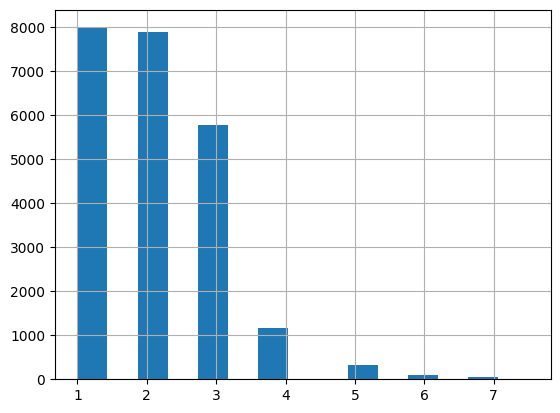

In [33]:
data_clean = data.query('rooms != 0')
data_clean['rooms'].hist(bins=15, range=(1, 7.5));

Устраним выбивающиеся значения из столбца **ceiling_height**, которые, вероятно, должны быть дробными и в которых, очевидно пропущен разделитель дроби. За точку отсчёта возьмём высоту 10 метров (реальные 1 метр), так как метровые потолки встречаются в исходных данных.  Избавимся также от данных столбца **ceiling_height** меньше нижней границы размаха нормального распределения - 2,5 метров.

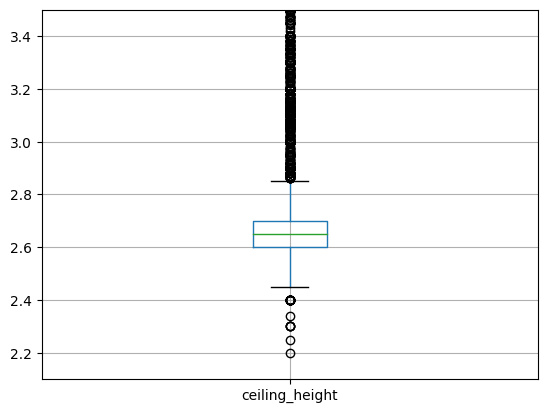

In [34]:
data_clean.boxplot('ceiling_height')
plt.ylim(2.1, 3.5);

In [35]:
data_clean.loc[data_clean['ceiling_height'] >= 25, 'ceiling_height'] = data_clean['ceiling_height'] / 10

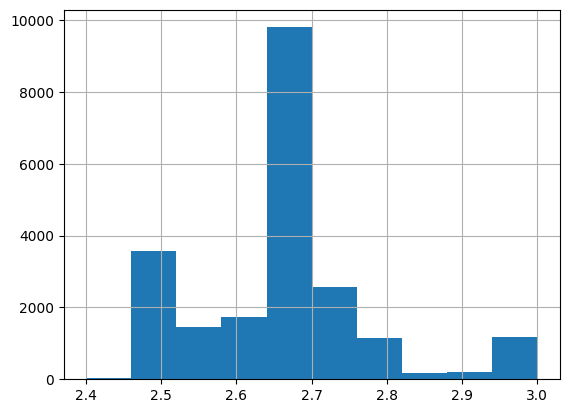

In [36]:
data_clean['ceiling_height'].hist(bins=10, range=(2.4, 3));

Данные из полученного графика укладываются в представление о нормальной высоте потолкав диапазоне 2,5-3 метра. Более высокие значения могут быть связаны с нестандартными параметрами продаваемой недвижимости, но такой в исходных данных очень мало

Мы провели предварительную обработку данныхб избавились от строк с пропущенными значениями там, где это не был критично для исследования. В других случаях пропуски заполнили медианными значениями по столбцу в том числе с группировкой данны. Также мы проверили датафрейм на наличие явных дубликатов, которых не оказалось и устранили неявное дублирование названий населённых пунктов в столбце **locality_name**. Кроме того, избавились от аномальных значений, которые могли исказить результаты исследования и изменили типы данных в некоторых столбцах, для удобства и корректности расчётов.

### Посчитайте и добавьте в таблицу новые столбцы

Добавим в датафрейм новые столбцы:

Цена одного квадратного метра

In [37]:
data_clean['meter_price'] = data_clean['last_price'] / data_clean['total_area']

День недели публикации объявления

In [38]:
data_clean['ad_post_day'] = pd.to_datetime(data_clean['first_day_exposition']).dt.dayofweek

Месяц публикации объявления

In [39]:
data_clean['first_day_exposition'].dt.date #приводим к временному формату
data_clean['ad_post_month'] = data_clean['first_day_exposition'].astype('datetime64[M]')
data_clean['ad_post_month']

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23697   2017-03-28
23698   2017-07-21
Name: ad_post_month, Length: 23371, dtype: datetime64[ns]

Год публикации объявления

In [40]:
data_clean['ad_post_year'] = pd.DatetimeIndex(data_clean['first_day_exposition']).year

Тип этажа квартиры

In [41]:
def floor_group(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'
    
data_clean['floor_type'] = data_clean.apply(floor_group, axis = 1)

Расстояние до центра города в километрах

In [42]:
data_clean['city_centers_nearest_km'] = round(data_clean['cityCenters_nearest'] / 1000)

In [43]:
data_clean['city_centers_nearest_km']

0        16.0
1        19.0
2        14.0
3         7.0
4         8.0
         ... 
23694     4.0
23695    13.0
23696    13.0
23697    10.0
23698    13.0
Name: city_centers_nearest_km, Length: 23371, dtype: float64

На этом этапе анализа мы дополнили исходный датафрейм новой информацией, которая позволит провести более качественное исследование.

### Проведите исследовательский анализ данных

#### Построим гистограммы для столбцов с параметрами датафрейма для оценки распределения значений.

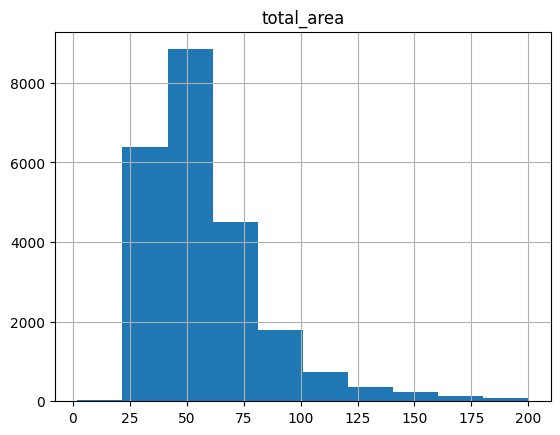

In [44]:
data_clean.hist('total_area', range=(2, 200));

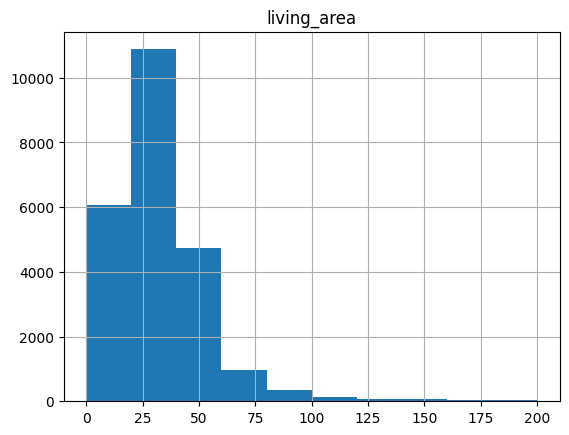

In [45]:
data_clean.hist('living_area', range=(0, 200));

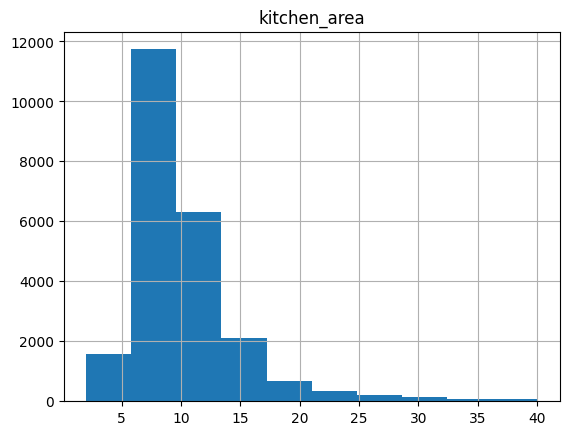

In [46]:
data_clean.hist('kitchen_area', range=(2, 40));

Распределение значений в столбцах **total_area**, **living_area** и **kitchen_area** после удаления аномальных значений соответствует распределению Пуассона. Гистограммы имеюют похожий вид, так как общая площадь, жилая площадь и площадь кухни с большой долей вероятности зависят друг от друга. Больше всего объявлений о недвижимости с общей площадью 50 кв. метров, жилой площадью около 25 кв. метров и площадью кухни около 9 кв. метров.

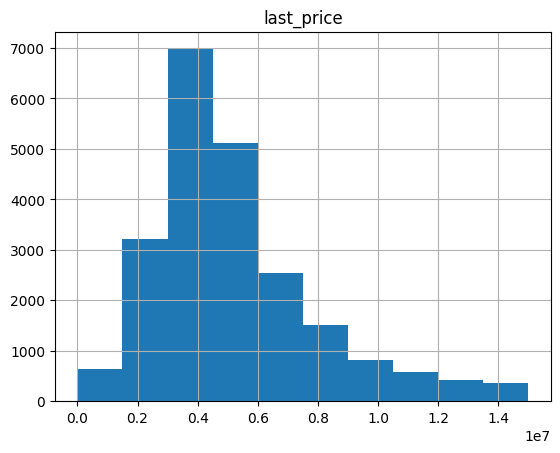

In [47]:
data_clean.hist('last_price', range=(0, 15000000));

График цен на недвижимость **last_price** также похож на распределение Пуассона, очевидно, что цена также соотносится с графиком площади жилья в большей степени, чем с другими параметрами. 

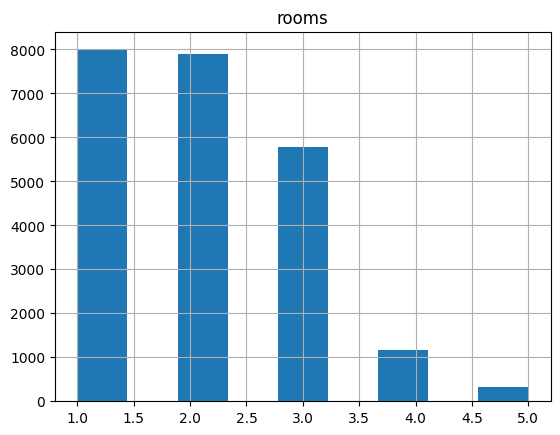

In [48]:
data_clean.hist('rooms', range=(1, 5), bins=9);

Значения из столбца **rooms** показывают, что наиболее часто встречаются объявления о недвижимости с одной и двумя комнатами. Это говорит, в первую очередь о том, что именно такая застройка наиболее типична и популярна. 

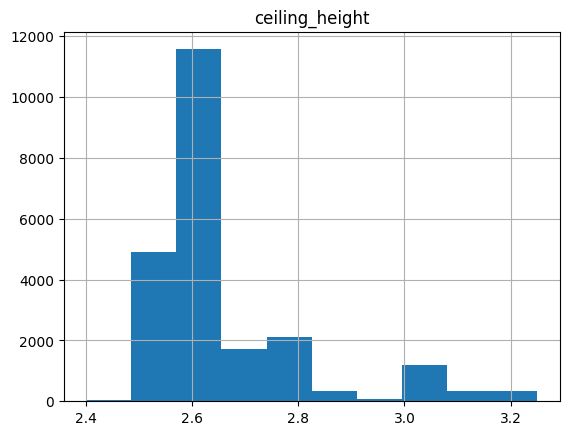

In [49]:
data_clean.hist('ceiling_height', range=(2.4, 3.25));

Как видно из полученных графиков медианное значение высоты потолка (**ceiling_height**) тоже наиболее распространено, опять же это говорит о том, что недвижимость из объявлений перимущественно типовая.

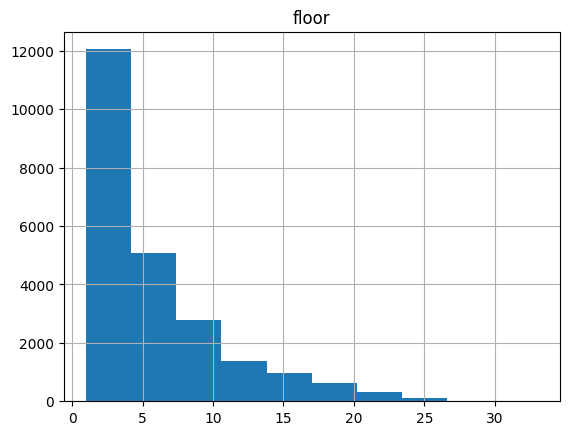

In [50]:
data_clean.hist('floor');

В объявлениях распространена недвижимость, размещённая на первых этажах, что показывает гистограмма столбца **floor**. 

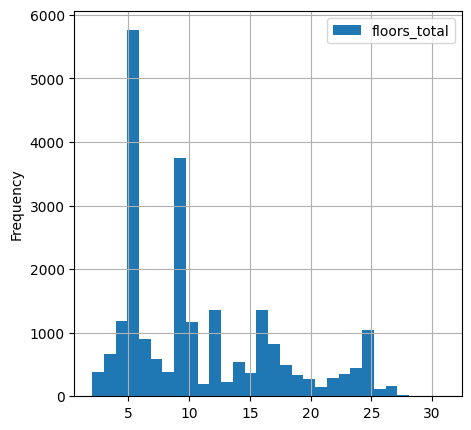

In [51]:
data_clean.plot(y = 'floors_total', kind = 'hist', bins = 30, range = (2,31), grid=True, figsize = (5,5));

Полученный график показывает, что наиболее распространённая этажность домов с продаваемыми квартирами - пять и девять этажей, что соответствует стандартной городской застройке. Также есть пики в значения 16 и 25 этажей, это, вероятно, высотная застройка, в том числе в новых районах города.

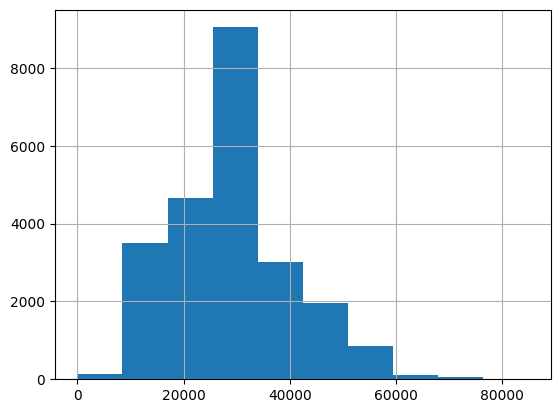

In [52]:
data_clean['airports_nearest'].hist();

На графике в целом показано нормальное распределение данных. Отмечается явный пик в области 20 км. Возможно связано это с большим количеством объявлений в населённых пунктах, далёких от аэропорта.

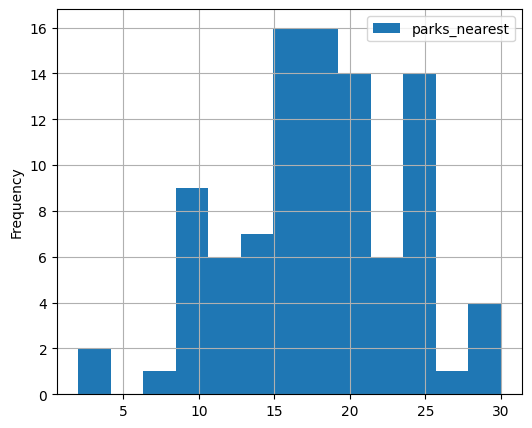

In [53]:
data_clean.plot(y = 'parks_nearest', kind = 'hist', bins = 13, range = (2, 30), grid=True, figsize = (6,5));

Полученный график показывает, что наиболее часто квартиры продаются в районах, удалённых от парков в пределах 10 километров. Это может говорить о том что в этом радиусе есть зелёные зоны от которых идёт отсчёт.

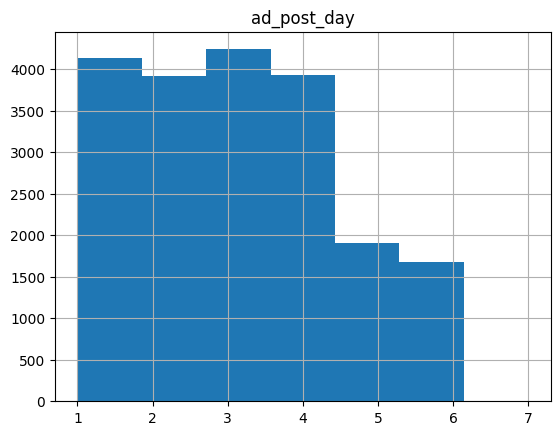

In [54]:
data_clean.hist('ad_post_day', bins=7, range=(1, 7));

Судя по всему, объявления размещаются чаще в первой половине недели и количество их снижается с пятницы. Также очевиден провал в воскресенье. Это можно связать с работой риэлторов, которые в выходные не занимаются размещением объявлений.

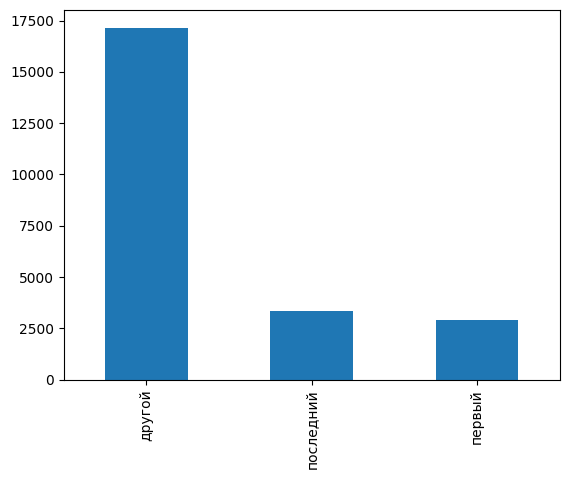

In [55]:
data_clean['floor_type'].value_counts().plot.bar();

Преобладание категории "другой" очевидно связано с тем, что она объединяет собой все этажи больше первого и меньше последнего.

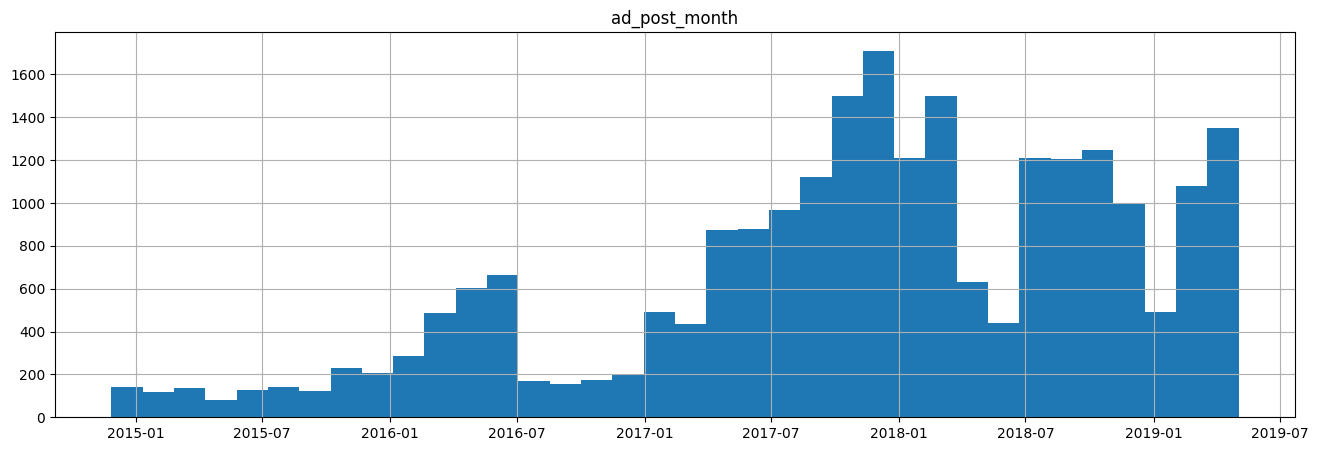

In [56]:
data_clean.hist('ad_post_month', bins=36, figsize = (16,5));

По полученному графику заметно, что примерно с весны 2017 года наметилось оживление на рынке недвижимости и рост продаваемой недвижимости с наивысшим пиком весной 2018 года и провалами в районе января и мая 2018 года.

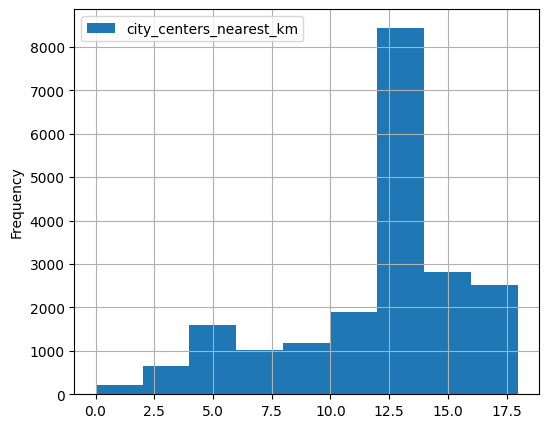

In [57]:
data_clean.plot(y = 'city_centers_nearest_km', kind = 'hist', bins = 9, range = (0, 18), grid=True, figsize = (6,5));

По графику видно, что наибольший пик объявлений связан с квартирами, продаваемыми в тринадцати километрах от центра. Возможно это строящийся микрорайон или жилой комплекс.

#### Изучим как быстро продавались квартиры

Будем строить график на основе значений выше 0, так как раньше мы заменили на 0 активные объявления и в целом удобнее рассчитывать сроки продажи отталкиваясь от полных дней.

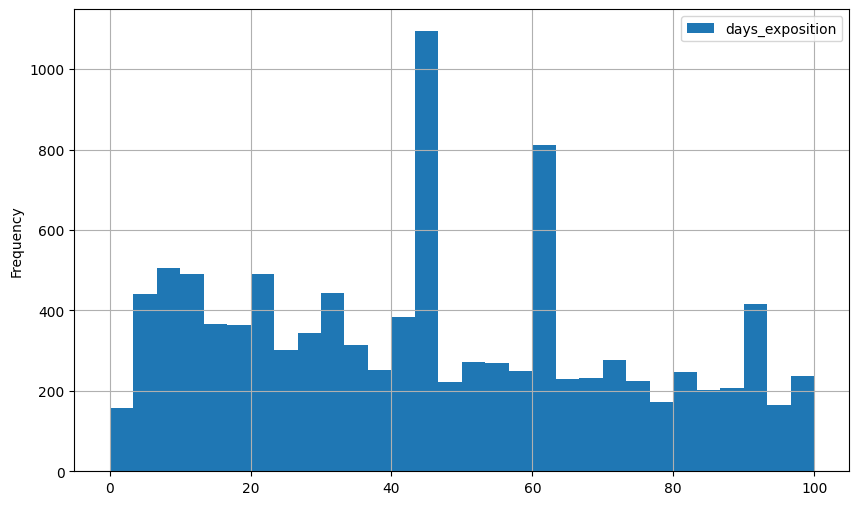

In [58]:
data_clean = data_clean.query('days_exposition > 0')
data_clean.plot(y='days_exposition', kind = 'hist', bins = 30, range = (0,100), grid=True, figsize = (10,6));

Из полученного графика мы видим, что недвижимость зачастую продаётся в первый месяц со дня размещения объявления. Достаточно часто объявление снимают на 10 день после публикации. Важно обратить внимание на пики около 45-50 и 60 дней. Может срок ближе к двум месяцам со дня размещения является какой-то психологической точкой для продавца недвижимости, возможно к этому времени он охотнее готов уступать в цене или предпринимает активные попытки продать недвижимость другим способом - не только по объявлению. Вероятно также, что правила самой платформы предполагают авотматическое удаление объявление по истечении определенного срока.

#### Изучим какие факторы больше всего повлияли на общую стоимость объекта

Изучим, зависит ли цена недвижимости от:

- общей площади
- жилой площади
- площади кухни
- количества комнат
- этажа, на котором находится квартира
- даты размещения объявления (день и месяц)

Для этого построим графики зависимости.

Коэффициент корреляции Пирсона: 0.6425308509615018


(0.0, 600.0)

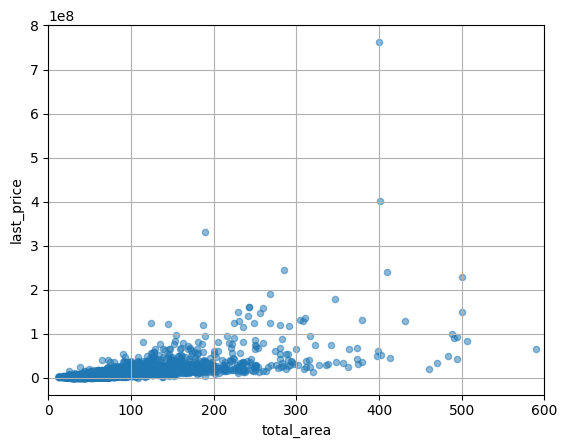

In [59]:
print('Коэффициент корреляции Пирсона:', data_clean['total_area'].corr(data_clean['last_price']))
data_clean.plot(x='total_area', y='last_price', kind='scatter', alpha=0.5, grid=True); plt.xlim(0, 600)

Коэффициент корреляции Пирсона: 0.5340526666649067


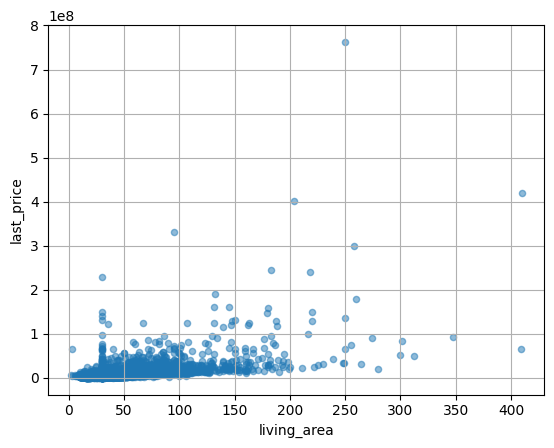

In [60]:
print('Коэффициент корреляции Пирсона:', data_clean['living_area'].corr(data_clean['last_price']))
data_clean.plot(x='living_area', y='last_price', kind='scatter', alpha=0.5, grid=True);

Коэффициент корреляции Пирсона: 0.3555307216125892


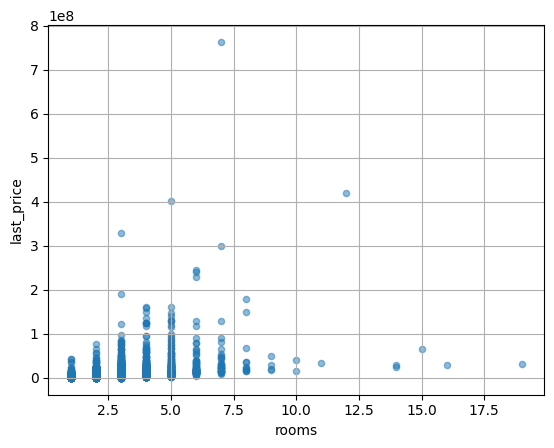

In [61]:
print('Коэффициент корреляции Пирсона:', data_clean['rooms'].corr(data_clean['last_price']))
data_clean.plot(x='rooms', y='last_price', kind='scatter', alpha=0.5, grid=True);

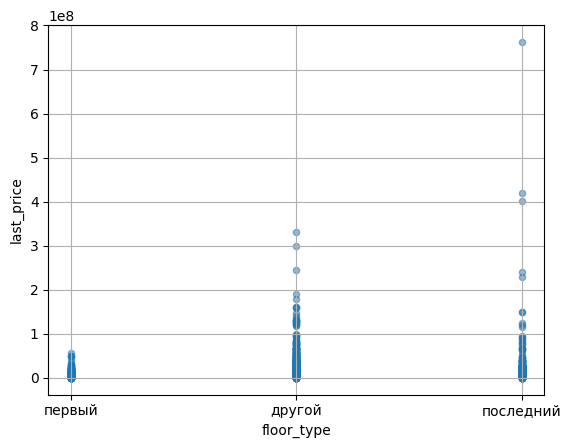

In [62]:
data_clean.plot(x='floor_type', y='last_price', kind='scatter', alpha=0.5, grid=True);

Коэффициент корреляции Пирсона: 0.9999999999999998


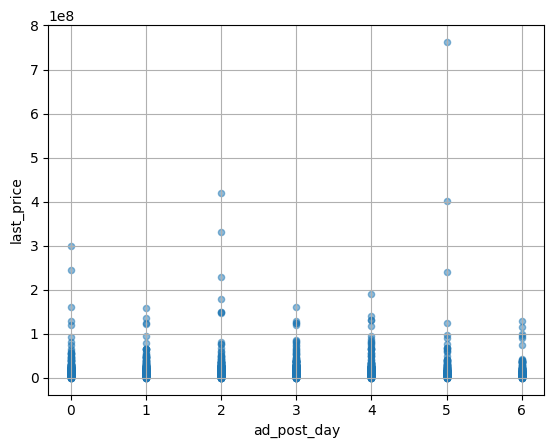

In [63]:
print('Коэффициент корреляции Пирсона:', data_clean['last_price'].corr(data_clean['last_price']))
data_clean.plot(x='ad_post_day', y='last_price', kind='scatter', alpha=0.5, grid=True);

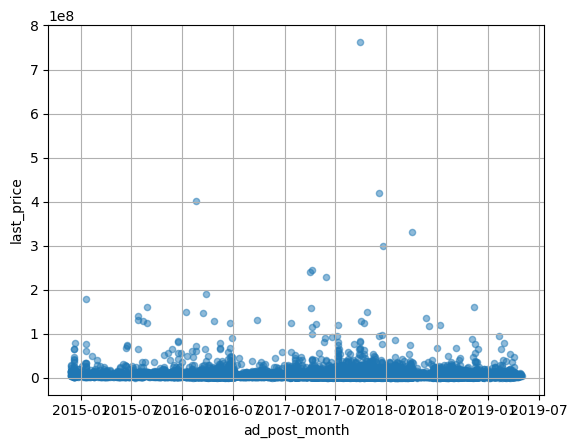

In [64]:
data_clean.plot(x='ad_post_month', y='last_price', kind='scatter', alpha=0.5, grid=True);

Коэффициент корреляции Пирсона и диаграмма рассеяния показывают наличие связи между общей площадью квартиры и её ценой. До определённого момента цена растёт вместе с площадью квартиры. Однако примерно после значения около 150 кв. метров цена даже снижается, возможно это связано с расположением недвижимости и меньшей популярностью квартир с нестандартно большой площадью, так как она может быть дороже в содержании. Относительно похожую картину можно наблюдать в зависимости цены от жилой площади. 

Зависимость цены недвижимости от количества комнат довольно слабая, график при этом показывает, что наиболее дорогие квартиры с четырьмя-пятью комнатами. Также мы видим, что квартиры на первом этаже заметно дешевле других.

При этом мы ещё видим слабую зависимость цены от дня публикации объявления и достаточно сильную от месяца его размещения.

#### Рассчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

In [65]:
top10_mean = data_clean.pivot_table(index='locality_name', values='last_price', aggfunc=['count', 'mean'])
top10_mean.columns = ['last_price_count', 'last_price_mean']
top10_mean.sort_values(by='last_price_count', ascending=False).head(10)

,last_price_count,last_price_mean
locality_name,,
Санкт-Петербург,13476,7.683998e+06
посёлок посёлок Мурино,521,3.717607e+06
Кудрово,419,4.361789e+06
посёлок Шушары,403,4.063913e+06
Всеволожск,335,3.705141e+06
Колпино,308,3.910371e+06
Пушкин,307,6.232066e+06
посёлок Парголово,298,4.420364e+06
Гатчина,268,3.368844e+06


Мы произвели расчёт средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Ожидаемо, что на первом месте по количеству объявлений и средней цене находится Санкт-Петербург. 

#### Опишем как стоимость объектов зависит от расстояния до центра города

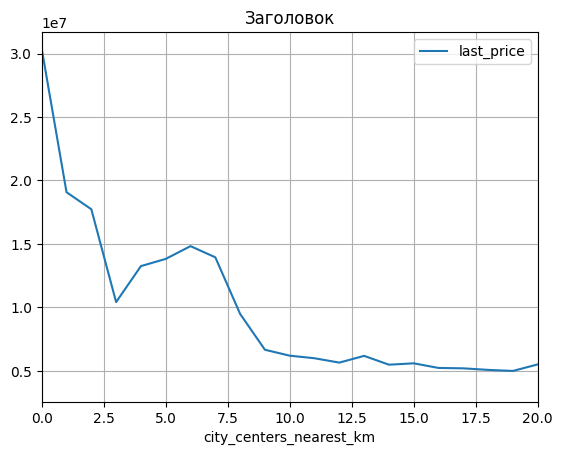

In [66]:
saint_p = data_clean.query('locality_name == "Санкт-Петербург"')
saint_p.pivot_table(index='city_centers_nearest_km', values='last_price', aggfunc='mean') \
    .plot(y='last_price', grid = True, title = 'Заголовок'), plt.xlim(0, 20);

По графику можно сделать вывод, что расположение к центру города действительно влияет на цену недвижимости. В самом центре наиболее высокие цены на квартиры. Далее по мере удаления от центра цена снижается. Стоит добавить что провалы между пиками могут быть следствием того, что на цену квартиры влияет совокупность других факторов, допустим застройка на определённом расстоянии от центра слишком старая из-за чего цена низкая, несмотря на расположение.

### Общий вывод

Мы провели анализ рынка недвижимости Санкт-Петербурга и Ленинградской области. Произвели предобработку данных с удалением аномальных значений, заполнением пропусков, где это было возможно и необходимо, также обогатили датафрейм новыми столбцами на основе расчётов из исходных данных.
В ходе проведённого исследования выявили наиболее сильную зависимость цены недвижимости от общей площади квартиры и расположения от центра города. Важный момент, что проведённый анализ оценивает общую ситуацию по рынку, без сегментации по каким-либо когортам. Больше всего недвижимости, предсказуемо, продаётся в Санкт-Петербурге, вероятно, так как само количество объектов там больше. Цена на недвижимость, относительно других населённых пунктов там также выше. 